# Load Data and Explore

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import yfinance as yf
import seaborn as sns

In [4]:
portfolio_df = pd.read_excel('../data/TCI.xlsx', sheet_name='Sheet1')

In [5]:
portfolio_df.head()

,Year,Quarter End,Security Type,Mkt value,Qty,ISIN,SEDOL,Coupon,Maturity,Instrument Description,Issuer,Sector,% of NAV
0,2018,1,Equity,2.269794e+09,61864102,US90130A1016,BBM4S68,NaN,NaN,TWENTY FIRST CENTURY FOX CL A ORD (NMS),21st Century Fox,NaN,0.128385
1,2018,1,Equity,3.703355e+08,10182445,US90130A2006,BBM4S80,NaN,NaN,TWENTY FIRST CENTURY FOX CL B ORD (NMS),21st Century Fox,NaN,0.020947
2,2018,1,Equity,1.330941e+09,6600000,ES0105046009,BVRZ8L1,NaN,NaN,AENA ORD (MCE) CFD,Aena,NaN,0.075281
3,2018,1,Equity,1.681670e+09,14549199,NL0000235190,4012250,NaN,NaN,AIRBUS ORD (PAR),Airbus,NaN,0.095119
4,2018,1,Equity,-4.483429e+09,-24427531,US01609W1027,BP41ZD1,NaN,NaN,ALIBABA GROUP HOLDING ADR REP 1 ORD (NYS),Alibaba,NaN,-0.253593


In [6]:
print(portfolio_df.shape)

(1271, 13)


In [7]:
portfolio_df['Year Quarter Formatted'] = portfolio_df['Year'].astype(str) + '-Q' + portfolio_df['Quarter End'].astype(str)
portfolio_df['Year Quarter Date'] = pd.to_datetime(portfolio_df['Year Quarter Formatted']) + pd.offsets.QuarterEnd(0)

/tmp/ipykernel_3403622/4149915252.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  portfolio_df['Year Quarter Date'] = pd.to_datetime(portfolio_df['Year Quarter Formatted']) + pd.offsets.QuarterEnd(0)


In [8]:
portfolio_df.iloc[123:126]

,Year,Quarter End,Security Type,Mkt value,Qty,ISIN,SEDOL,Coupon,Maturity,Instrument Description,Issuer,Sector,% of NAV,Year Quarter Formatted,Year Quarter Date
123,2018,3,Equity Swap,-3.318661e+08,-1885440,DE0007664039,5497168,NaN,NaN,VOLKSWAGEN PR (GER) CFD,Volkswagen (short),NaN,-0.016244,2018-Q3,2018-09-30
124,2018,3,Equity Swap,-5.704467e+08,-28096331,AU000000WOW2,6981239,NaN,NaN,WOOLWORTHS ORD (ASX) CFD,Woolworths,NaN,-0.027922,2018-Q3,2018-09-30
125,2018,4,Equity,4.916598e+09,102173681,US90130A3095,BJ0M5P8,NaN,NaN,TWENTY FIRST CENTURY FOX CL A ORD (NMS) (DEAD ...,21st Century Fox,NaN,0.264040,2018-Q4,2018-12-31


In [9]:
security_type_count = portfolio_df.groupby('Security Type')['ISIN'].nunique()
print(security_type_count)

Security Type
Equity           78
Equity Option     2
Equity Swap      31
Name: ISIN, dtype: int64


In [10]:
portfolio_equity_df = portfolio_df[portfolio_df['Security Type']=='Equity']
portfolio_equity_df.head()

,Year,Quarter End,Security Type,Mkt value,Qty,ISIN,SEDOL,Coupon,Maturity,Instrument Description,Issuer,Sector,% of NAV,Year Quarter Formatted,Year Quarter Date
0,2018,1,Equity,2.269794e+09,61864102,US90130A1016,BBM4S68,NaN,NaN,TWENTY FIRST CENTURY FOX CL A ORD (NMS),21st Century Fox,NaN,0.128385,2018-Q1,2018-03-31
1,2018,1,Equity,3.703355e+08,10182445,US90130A2006,BBM4S80,NaN,NaN,TWENTY FIRST CENTURY FOX CL B ORD (NMS),21st Century Fox,NaN,0.020947,2018-Q1,2018-03-31
2,2018,1,Equity,1.330941e+09,6600000,ES0105046009,BVRZ8L1,NaN,NaN,AENA ORD (MCE) CFD,Aena,NaN,0.075281,2018-Q1,2018-03-31
3,2018,1,Equity,1.681670e+09,14549199,NL0000235190,4012250,NaN,NaN,AIRBUS ORD (PAR),Airbus,NaN,0.095119,2018-Q1,2018-03-31
4,2018,1,Equity,-4.483429e+09,-24427531,US01609W1027,BP41ZD1,NaN,NaN,ALIBABA GROUP HOLDING ADR REP 1 ORD (NYS),Alibaba,NaN,-0.253593,2018-Q1,2018-03-31


In [11]:
print(portfolio_equity_df.shape)

(835, 15)


In [12]:
portfolio_swap_df = portfolio_df[portfolio_df['Security Type']=='Equity Swap']
portfolio_swap_df.head()

,Year,Quarter End,Security Type,Mkt value,Qty,ISIN,SEDOL,Coupon,Maturity,Instrument Description,Issuer,Sector,% of NAV,Year Quarter Formatted,Year Quarter Date
33,2018,1,Equity Swap,1.091186e+09,5411079,ES0105046009,BVRZ8L1,NaN,NaN,AENA ORD (MCE) CFD,Aena,NaN,0.061720,2018-Q1,2018-03-31
34,2018,1,Equity Swap,1.262365e+09,40733147,IT0003506190,7667163,NaN,NaN,ATLANTIA ORD (MIL) CFD,Atlantia,NaN,0.071402,2018-Q1,2018-03-31
35,2018,1,Equity Swap,1.632502e+09,502453067,AU000000AZJ1,B87CVM3,NaN,NaN,AURIZON ORD (ASX) CFD,Aurizon,NaN,0.092338,2018-Q1,2018-03-31
36,2018,1,Equity Swap,2.395772e+08,50115599,BRCESPACNPB4,B17MHG0,NaN,NaN,CIA ENERGETICA DE SAO PAULO B PRF (SAO) CFD,CESP,NaN,0.013551,2018-Q1,2018-03-31
37,2018,1,Equity Swap,3.062096e+07,2142210,FR0010533075,B292JQ9,NaN,NaN,GETLINK ORD (PAR) CFD,Eurotunnel,NaN,0.001732,2018-Q1,2018-03-31


In [13]:
print(portfolio_swap_df.shape)

(434, 15)


# Portfolio Summary

In [14]:
def create_stacked_bar_chart(df: pd.DataFrame, stacked_column: str):
    """
    Generates a stacked bar chart showing the stacked_column for each ISIN per quarter.

    Args:
        df: A pandas DataFrame with the specified columns.
        stacked_column: variable header whose value to be stacked
    """
    # --- 1. Data Cleaning and Preparation ---
    # Ensure the specified column is a numeric type
    df[stacked_column] = pd.to_numeric(df[stacked_column], errors='coerce')

    # Drop any rows where the stacked_column value is missing or could not be converted
    df.dropna(subset=[stacked_column], inplace=True)
    print(df.shape)

    # --- 2. Create the stacked bar chart using Plotly Express ---
    # The x-axis is the 'Year Quarter Formatted' column
    # The y-axis is the value from the 'stacked_column'
    # The 'color' parameter stacks the bars by 'ISIN'
    fig = px.bar(
        df,
        x='Year Quarter Formatted',
        y=stacked_column,
        color='ISIN',
        title=f'Holding Weight ({stacked_column}) of Each ISIN per Quarter',
        labels={
            stacked_column: f'Value of {stacked_column}',
            'Year Quarter Formatted': 'Quarter'
        },
        hover_data={'ISIN': True, stacked_column: ':.2'} # Format hover tooltip
    )

    # Customize the layout for better readability
    fig.update_layout(
        xaxis_title='Quarter',
        yaxis_title=f'Percentage of NAV ({stacked_column})',
        legend_title='ISIN',
        barmode='stack', # This ensures the bars are stacked
        uniformtext_minsize=8, # Ensure labels are readable
        uniformtext_mode='hide', # Hide text if it doesn't fit
    )

    fig.show()


### Market Value

In [15]:
portfolio_pivot_mkt_value = pd.pivot_table(
    portfolio_df,
    values='Mkt value',
    index=['ISIN', 'Issuer'],
    columns='Year Quarter Formatted',
    aggfunc='sum'
)

In [16]:
portfolio_pivot_mkt_value.head()

Year Quarter Formatted            2018-Q1       2018-Q2       2018-Q3  \
ISIN         Issuer                                                     
AU000000AZJ1 Aurizon         1.632502e+09  1.420560e+09  5.336968e+08   
AU000000IFN8 Infigen                  NaN           NaN           NaN   
             Infigen Energy  6.281136e+07  6.831314e+07  5.963276e+07   
AU000000WOW2 Woolworths     -6.329407e+08 -7.083289e+08 -5.704467e+08   
BMG475671050 IHS Markit Ltd           NaN           NaN           NaN   

Year Quarter Formatted            2018-Q4       2019-Q1       2019-Q2  \
ISIN         Issuer                                                     
AU000000AZJ1 Aurizon                  NaN           NaN           NaN   
AU000000IFN8 Infigen                  NaN           NaN  4.660510e+07   
             Infigen Energy  4.583519e+07  4.364771e+07           NaN   
AU000000WOW2 Woolworths     -3.741958e+08 -2.127914e+08 -2.100291e+08   
BMG475671050 IHS Markit Ltd           NaN           NaN           NaN   

Year Quarter Formatted            2019-Q3       2019-Q4       2020-Q1  \
ISIN         Issuer                                                     
AU000000AZJ1 Aurizon                  NaN           NaN           NaN   
AU000000IFN8 Infigen         6.516443e+07  6.477188e+07  3.785504e+07   
             Infigen Energy           NaN           NaN           NaN   
AU000000WOW2 Woolworths     -2.265967e+08 -2.285481e+08 -1.939870e+08   
BMG475671050 IHS Markit Ltd           NaN           NaN           NaN   

Year Quarter Formatted            2020-Q2  ...  2022-Q4  2023-Q1  2023-Q2  \
ISIN         Issuer                        ...                              
AU000000AZJ1 Aurizon                  NaN  ...      NaN      NaN      NaN   
AU000000IFN8 Infigen         9.415558e+07  ...      NaN      NaN      NaN   
             Infigen Energy           NaN  ...      NaN      NaN      NaN   
AU000000WOW2 Woolworths     -8.760004e+07  ...      NaN      NaN      NaN   
BMG475671050 IHS Markit Ltd           NaN  ...      NaN      NaN      NaN   

Year Quarter Formatted       2023-Q3  2023-Q4  2024-Q1  2024-Q2  2024-Q3  \
ISIN         Issuer                                                        
AU000000AZJ1 Aurizon             NaN      NaN      NaN      NaN      NaN   
AU000000IFN8 Infigen             NaN      NaN      NaN      NaN      NaN   
             Infigen Energy      NaN      NaN      NaN      NaN      NaN   
AU000000WOW2 Woolworths          NaN      NaN      NaN      NaN      NaN   
BMG475671050 IHS Markit Ltd      NaN      NaN      NaN      NaN      NaN   

Year Quarter Formatted       2024-Q4  2025-Q1  
ISIN         Issuer                            
AU000000AZJ1 Aurizon             NaN      NaN  
AU000000IFN8 Infigen             NaN      NaN  
             Infigen Energy      NaN      NaN  
AU000000WOW2 Woolworths          NaN      NaN  
BMG475671050 IHS Markit Ltd      NaN      NaN  

[5 rows x 29 columns]

(1271, 15)


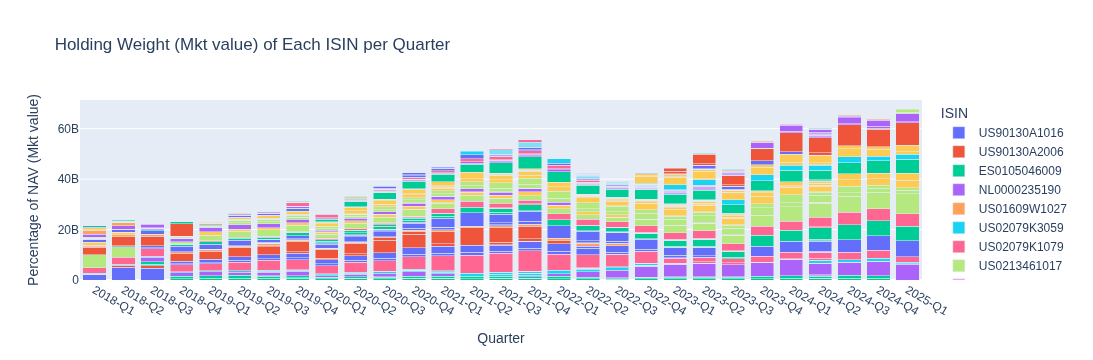

In [17]:
create_stacked_bar_chart(portfolio_df, 'Mkt value')

/tmp/ipykernel_3403622/2084563770.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_3403622/2084563770.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(835, 15)


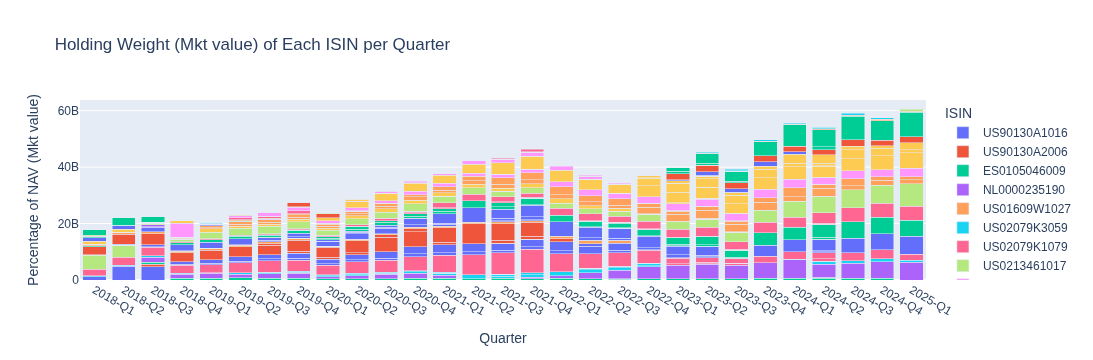

In [18]:
create_stacked_bar_chart(portfolio_equity_df, 'Mkt value')

### % of NAV

In [19]:
portfolio_pivot_nav = pd.pivot_table(
    portfolio_df,
    values='% of NAV',
    index=['ISIN', 'Issuer'],
    columns='Year Quarter Formatted',
    aggfunc='sum'
)

In [20]:
portfolio_pivot_nav.head()

Year Quarter Formatted        2018-Q1   2018-Q2   2018-Q3   2018-Q4   2019-Q1  \
ISIN         Issuer                                                             
AU000000AZJ1 Aurizon         0.092338  0.071610  0.026123       NaN       NaN   
AU000000IFN8 Infigen              NaN       NaN       NaN       NaN       NaN   
             Infigen Energy  0.003553  0.003444  0.002919  0.002462  0.001909   
AU000000WOW2 Woolworths     -0.035801 -0.035706 -0.027922 -0.020096 -0.009304   
BMG475671050 IHS Markit Ltd       NaN       NaN       NaN       NaN       NaN   

Year Quarter Formatted        2019-Q2   2019-Q3   2019-Q4   2020-Q1   2020-Q2  \
ISIN         Issuer                                                             
AU000000AZJ1 Aurizon              NaN       NaN       NaN       NaN       NaN   
AU000000IFN8 Infigen         0.001884  0.002540  0.002287  0.001785  0.003358   
             Infigen Energy       NaN       NaN       NaN       NaN       NaN   
AU000000WOW2 Woolworths     -0.008490 -0.008831 -0.008069 -0.009148 -0.003124   
BMG475671050 IHS Markit Ltd       NaN       NaN       NaN       NaN       NaN   

Year Quarter Formatted       ...  2022-Q4  2023-Q1  2023-Q2  2023-Q3  2023-Q4  \
ISIN         Issuer          ...                                                
AU000000AZJ1 Aurizon         ...      NaN      NaN      NaN      NaN      NaN   
AU000000IFN8 Infigen         ...      NaN      NaN      NaN      NaN      NaN   
             Infigen Energy  ...      NaN      NaN      NaN      NaN      NaN   
AU000000WOW2 Woolworths      ...      NaN      NaN      NaN      NaN      NaN   
BMG475671050 IHS Markit Ltd  ...      NaN      NaN      NaN      NaN      NaN   

Year Quarter Formatted       2024-Q1  2024-Q2  2024-Q3  2024-Q4  2025-Q1  
ISIN         Issuer                                                       
AU000000AZJ1 Aurizon             NaN      NaN      NaN      NaN      NaN  
AU000000IFN8 Infigen             NaN      NaN      NaN      NaN      NaN  
             Infigen Energy      NaN      NaN      NaN      NaN      NaN  
AU000000WOW2 Woolworths          NaN      NaN      NaN      NaN      NaN  
BMG475671050 IHS Markit Ltd      NaN      NaN      NaN      NaN      NaN  

[5 rows x 29 columns]

(1271, 15)


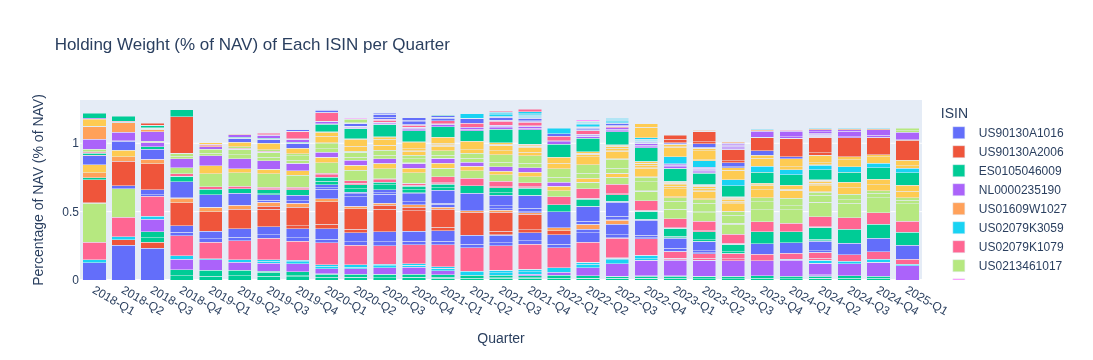

In [21]:
create_stacked_bar_chart(portfolio_df, '% of NAV')

# Return Measures

### Simple Return

### Log Return

# Risk Measures

### Valatility

### Maximum Drawdown

# Risk-adjusted Performance

### Sharp Ratio

### Sortino Ratio

### Treynor Ratio

### Calmar Ratio

# Market Sensitivity

### Alpha

### Beta

# Tail-Risk Metrics

### Value at Risk (VaR) at 90%, 95%, and 99% Confidence Levels